# AllState Claim Severity

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict
from sklearn import linear_model

# Import Training data

In [4]:
train = pd.read_csv('train.csv')
print(type(train))
train.drop('id', axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>


# Converting Categorical variables to Numerical values

### Create a dataframe with only categorical variables to convert them into numerical using hot code encoder

# Select columns satrting with 'cat' and form a list

In [5]:
def SplitIntoCatAndCont(features):
    cat_col_list = []
    cont_col_list = []
    for i in features:
        if i.startswith("cat"):
            cat_col_list.append(i)
        else:
            cont_col_list.append(i)
            
    return cat_col_list, cont_col_list

### Convert lists to dataframes of 'cat' and 'col'

In [7]:
def SplitDataFrameIntoCatAndCol (data_frame, train_cat_col_list, train_cont_col_list):
    cat_col_df = pd.DataFrame(data_frame, columns = train_cat_col_list)
    cont_col_df = pd.DataFrame(data_frame, columns = train_cont_col_list)
    return cat_col_df, cont_col_df

# Label Encoding of all data

In [24]:
def LabelEncoder(categoricalData, continuousData):
    # Categorical Feature Analysis
    from sklearn.preprocessing import LabelEncoder
    catFeatures = []
    for colName in categoricalData.columns:
        le = LabelEncoder()
        le.fit(categoricalData[colName].unique())
        categoricalData[colName] = le.transform(categoricalData[colName])
        
    encoded_train_data = categoricalData.join(continuousData)
    #encoded_train_data = pd.concat(categoricalData, continuousData, axis = 1, ignore_index = True)
    return encoded_train_data

# 10-fold Cross Validation

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import KFold

def cross_validation(total_samples, n_folds, X, Y, clf):
    accuracy = []
    kf = KFold(total_samples, n_folds, True) #Shuffle = True
    
    for train_index, test_index in kf:
        #print("TRAIN: ", train_index, "TEST: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy.append(mean_squared_error(y_test, predictions))
        print(accuracy)
        
    return clf, np.array(accuracy)

C:\Users\Jeet\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Scaling the features (except response feature) 

In [17]:
from sklearn.preprocessing import scale

def normalize(X):
    scale(X, axis = 0, with_mean = True, with_std = True, copy = True)
    
    return X

## Commands to execute for training data 

In [34]:
features = list(train.columns.values)

# cat_col_list, cont_col_list

train_cat_col_list, train_cont_col_list = SplitIntoCatAndCont(features)


train_cat_col_df, train_cont_col_df = SplitDataFrameIntoCatAndCol(train, train_cat_col_list, train_cont_col_list)

train_feature_df = LabelEncoder(train_cat_col_df, train_cont_col_df)

train_feature = np.array(train_feature_df)
r, c = train_feature.shape

# Create an array with index of columns
i_cols = []
for i in range(0, c-1):
    i_cols.append(i)
    
# Y is the target column, rest goes in X
X_train = train_feature[:, 0:(c-1)]
y_train = train_feature[:, (c-1)]

# Normalizaation of Features
X_train = normalize(X_train)

X_all = []

X_all.append([i_cols])

print("Shape of X")
print(X_train.shape)
print(type(X_train))
print(type(train_feature_df))

Shape of X
(188318, 130)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


## Recursive Feature Elimination 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE

# Linear Regression
clf = LinearRegression(fit_intercept = True, normalize = True)

# RFE
selector = RFE(clf, n_features_to_select = 130, step = 1)
selector = selector.fit(X_train, y_train)

print(np.where(selector.support_ == True)[0])

featureNames = train_cat_col_list + train_cont_col_list

# print(featureNames)

finalFeatures = []

for num in np.where(selector.support_ == True)[0]:
    finalFeatures.append(featureNames[num])

print(finalFeatures)
print(type(finalFeatures))




[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129]
['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'c

In [39]:
X_finalFeatures_df = pd.DataFrame(train_feature_df, columns = finalFeatures)
X_finalFeatures_df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,1,0,0,0,0,1,0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0,1,0,0,0,0,0,0,1,1,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0,1,0,0,1,0,0,0,1,1,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,1,1,0,1,0,0,0,0,1,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0,1,0,1,0,0,0,0,1,1,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


## Ridge Regression 

In [40]:
from sklearn import linear_model

reg = linear_model.Ridge (alpha = 0.5)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size = 0.33, random_state = 42)
reg.fit(X_train1, y_train1)

predictions = reg.predict(X_test1)
RR_mae = mean_absolute_error(y_test1, predictions)
print(mean_absolute_error(y_test1, predictions))

1328.59944499


## Lasso 

In [41]:
clf = linear_model.Lasso(alpha = 0.1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size = 0.33, random_state = 42)
clf.fit(X_train1, y_train1)

predictions = clf.predict(X_test1)
Lasso_mae = mean_absolute_error(y_test1, predictions)
print(mean_absolute_error(y_test1, predictions))

1328.2302849


C:\Users\Jeet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Decision Tree Regressor 

In [43]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size = 0.33, random_state = 42)

regressor.fit(X_train1, y_train1)

predicitons = regressor.predict(X_test1)
DTR_mae = mean_absolute_error(y_test1, predictions)
print(mean_absolute_error(y_test1, predictions))

1328.2302849


## XGB Regressor 

In [45]:
import xgboost as xgb

clf = xgb.XGBRegressor()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size = 0.33, random_state = 42)
clf.fit(X_train1, y_train1)

predictions = clf.predict(X_test1)
XGB_mae = mean_absolute_error(y_test1, predictions)
print(mean_absolute_error(y_test1, predicitons))

1755.37111047


## Bagging (Rabdom Forest) 

In [46]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size = 0.33, random_state = 42)

clf.fit(X_train1, y_train1)

predictions = clf.predict(X_test1)
Bagging_mae = mean_absolute_error(y_test1, predictions)
print(mean_absolute_error(y_test1, predictions))


1315.00823084


## Boosting (adaBoost) 

In [47]:
from sklearn.ensemble import AdaBoostRegressor

clf = AdaBoostRegressor()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size = 0.33, random_state = 42)

clf.fit(X_train1, y_train1)

predictions = clf.predict(X_test1)
adaboost_mae = mean_absolute_error(y_test1, predicitons)
print(mean_absolute_error(y_test1, predicitons))

1755.37111047


## Stochastic Gradient Boosting 

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size = 0.33, random_state = 42)
clf.fit(X_train1, y_train1)

predictions = clf.predict(X_test1)
STGB_mae = mean_absolute_error(y_test1, predictions)
print(mean_absolute_error(y_test1, predictions))


1245.29499127


## Plotting Models MAE 

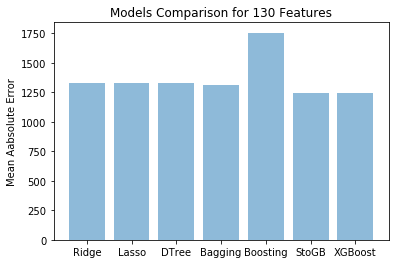

In [50]:
objects = ('Ridge', 'Lasso', 'DTree', 'Bagging', 'Boosting', 'StoGB', 'XGBoost')

y_pos = np.arange(len(objects))

performance = [RR_mae, Lasso_mae, DTR_mae, Bagging_mae, adaboost_mae, STGB_mae, XGB_mae]

plt.bar(y_pos, performance, align = 'center', alpha = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Aabsolute Error')
plt.title('Models Comparison for 130 Features')

plt.show()